# Drive mount and Load Data

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import pandas as pd
import os

In [81]:
# Specify the folder path
folder_path = '/content/drive/MyDrive/NLP_Datasets'

In [82]:
# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialize an empty list to store DataFrames
dataframes = []

# Loop over each file and read it into a DataFrame, then append to the list
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

In [83]:
print(f"Number of DataFrames loaded: {len(dataframes)}")

Number of DataFrames loaded: 19


In [84]:
for i, df in enumerate(dataframes, 1):
    print(f"DataFrame {i}: {df.shape[0]} rows, {df.shape[1]} columns")

DataFrame 1: 564 rows, 18 columns
DataFrame 2: 344 rows, 18 columns
DataFrame 3: 479 rows, 18 columns
DataFrame 4: 609 rows, 18 columns
DataFrame 5: 314 rows, 18 columns
DataFrame 6: 690 rows, 18 columns
DataFrame 7: 398 rows, 18 columns
DataFrame 8: 274 rows, 18 columns
DataFrame 9: 239 rows, 18 columns
DataFrame 10: 154 rows, 18 columns
DataFrame 11: 791 rows, 18 columns
DataFrame 12: 193 rows, 18 columns
DataFrame 13: 198 rows, 18 columns
DataFrame 14: 223 rows, 18 columns
DataFrame 15: 344 rows, 18 columns
DataFrame 16: 179 rows, 18 columns
DataFrame 17: 47 rows, 18 columns
DataFrame 18: 292 rows, 18 columns
DataFrame 19: 46 rows, 18 columns


In [85]:
# Concatenate all DataFrames
main_df = pd.concat(dataframes, ignore_index=True)

In [86]:
main_df.shape

(6378, 18)

In [87]:
main_df.head()

,helpfulVotes,id,lang,locationId,ownerResponse,photos,placeInfo,publishedDate,publishedPlatform,rating,roomTip,subratings,text,title,travelDate,tripType,url,user
0,0,978308991,en,14033359,NaN,"[{'id': '771259457', 'image': 'https://media-c...","{'id': '14033359', 'name': 'Le Grand Galle', '...",2024-11-01,OTHER,4,NaN,"[{'name': 'Value', 'value': 4}, {'name': 'Room...","As the other reviews state, it's a beautiful h...",Beautiful and well located,2024-10,FAMILY,https://www.tripadvisor.com/ShowUserReviews-g2...,"{'userId': 'E4935754E8CECD32CFD4C34EFE6D3614',..."
1,0,978088291,en,14033359,NaN,"[{'id': '770885147', 'image': 'https://media-c...","{'id': '14033359', 'name': 'Le Grand Galle', '...",2024-10-30,OTHER,5,NaN,[],"This was such a lovely hotel, and the view was...",Great stay!,2024-10,FAMILY,https://www.tripadvisor.com/ShowUserReviews-g2...,"{'userId': 'FF9D242D0106A33B8FB568A8948D3A29',..."
2,0,978084110,en,14033359,NaN,[],"{'id': '14033359', 'name': 'Le Grand Galle', '...",2024-10-30,OTHER,5,NaN,[],"Stay was absolutely perfect, staff were friend...",Perfect place in Galle,2024-10,SOLO,https://www.tripadvisor.com/ShowUserReviews-g2...,"{'userId': '5E72BB21E0A76A38BF49099B619533EE',..."
3,0,976805351,en,14033359,"{'id': '978086677', 'text': ""Dear Guest,\n\nTh...",[],"{'id': '14033359', 'name': 'Le Grand Galle', '...",2024-10-27,OTHER,3,NaN,"[{'name': 'Value', 'value': 3}, {'name': 'Room...",Our stay at Le Grand Galle Hotel was generally...,It was a nice stay but...,2024-10,COUPLES,https://www.tripadvisor.com/ShowUserReviews-g2...,"{'userId': '911C5DDFA75A610D884054B2148E8902',..."
4,0,974607870,en,14033359,"{'id': '978086673', 'text': ""Dear Guest,\n\nTh...",[],"{'id': '14033359', 'name': 'Le Grand Galle', '...",2024-10-19,OTHER,5,NaN,[],All staff members are very friendly and suppor...,Stay at le grand galle.,2024-10,COUPLES,https://www.tripadvisor.com/ShowUserReviews-g2...,"{'userId': 'B003663F67D2CF0D0AB933B02AAEF998',..."


In [88]:
# Get the columns of the first DataFrame as a reference
reference_columns = dataframes[0].columns

# Check if columns are the same in all DataFrames
for i, df in enumerate(dataframes, 1):
    if not df.columns.equals(reference_columns):
        print(f"DataFrame {i} has different columns.")
        print("Columns:", df.columns)
    else:
        print(f"DataFrame {i} has the same columns.")


DataFrame 1 has the same columns.
DataFrame 2 has the same columns.
DataFrame 3 has the same columns.
DataFrame 4 has the same columns.
DataFrame 5 has the same columns.
DataFrame 6 has the same columns.
DataFrame 7 has the same columns.
DataFrame 8 has the same columns.
DataFrame 9 has the same columns.
DataFrame 10 has the same columns.
DataFrame 11 has the same columns.
DataFrame 12 has the same columns.
DataFrame 13 has the same columns.
DataFrame 14 has the same columns.
DataFrame 15 has the same columns.
DataFrame 16 has the same columns.
DataFrame 17 has the same columns.
DataFrame 18 has the same columns.
DataFrame 19 has the same columns.


# Data Cleaning

In [89]:
# #Duplicate reviews can skew results and inflate the perceived number of reviews.
# main_df.drop_duplicates(subset=['id', 'text'], inplace=True)

In [90]:
# #Inspect for missing values, particularly in columns like text, title, rating, etc., as they are key for analysis.
# main_df.dropna(subset=['text', 'rating'], inplace=True)

In [91]:
# #Convert all text to lowercase to ensure consistency.
# main_df['text'] = main_df['text'].str.lower()

In [92]:
# #Reviews may contain special characters, numbers, and punctuation. For tokenization purposes, it’s common to remove these:
# main_df['text'] = main_df['text'].str.replace(r'[^a-z\s]', '', regex=True)

In [93]:
# #Stop words (like "and", "the", "in") are common but carry little meaning. Libraries like NLTK provide lists of stop words that can be removed.
# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# stop_words = set(stopwords.words('english'))
# main_df['text'] = main_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


# Data Cleaning 2nd method

In [ ]:
!pip install emoji

In [94]:
import re
import nltk
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stopwords and wordnet if needed
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = emoji.demojize(text)  # Replace emojis with descriptive text like :smiling_face:
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s:]', '', text)  # Remove non-alphanumeric characters except colons for emoji descriptions
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(words)

main_df['cleaned_text'] = main_df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data Describe

In [95]:
num_hotels = main_df['locationId'].nunique()
print(f"Number of hotels: {num_hotels}")

Number of hotels: 215


In [96]:
reviews_per_hotel = main_df.groupby('locationId')['id'].count()
print(reviews_per_hotel)

locationId
302888      58
304700      48
306376      50
306383      49
308529      50
            ..
25983119    49
26194654    50
26226338    58
26325123    21
28040522    47
Name: id, Length: 215, dtype: int64


In [97]:
total_words = main_df['cleaned_text'].str.split().apply(len).sum()
print(f"Total number of words: {total_words}")

Total number of words: 306966


In [98]:
unique_words = set(" ".join(main_df['cleaned_text']).split())
num_unique_words = len(unique_words)
print(f"Number of unique words: {num_unique_words}")

Number of unique words: 16361


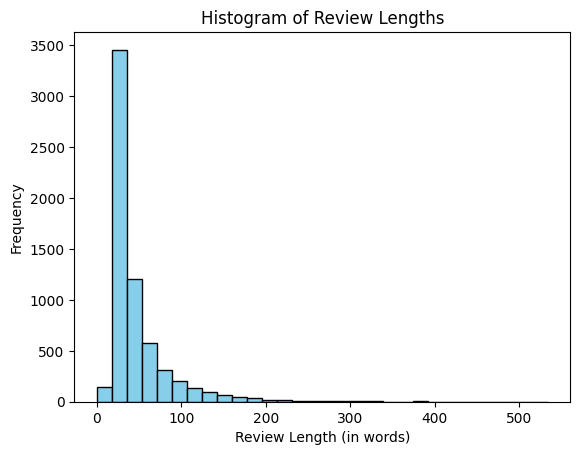

In [99]:
import matplotlib.pyplot as plt

review_lengths = main_df['cleaned_text'].str.split().apply(len)
plt.hist(review_lengths, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Review Length (in words)')
plt.ylabel('Frequency')
plt.title('Histogram of Review Lengths')
plt.show()

In [100]:
import ast

# Convert placeInfo strings to dictionaries (if they are strings)
main_df['placeInfo'] = main_df['placeInfo'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [101]:
# Define a function to safely extract the values from placeInfo
def extract_info(row):
    if isinstance(row, dict):  # Check if the row is a dictionary
        name = row.get('name', None)
        city = row.get('addressObj', {}).get('city', None)  # Safe access to nested city
        return pd.Series([name, city])
    else:
        return pd.Series([None, None])  # Return None if placeInfo is not a dictionary

# Apply the function to placeInfo and store the results in new columns
main_df[['hotel_name', 'city']] = main_df['placeInfo'].apply(extract_info)


In [102]:
# Display the extracted columns with the unique ID
main_df.head()

,helpfulVotes,id,lang,locationId,ownerResponse,photos,placeInfo,publishedDate,publishedPlatform,rating,...,subratings,text,title,travelDate,tripType,url,user,cleaned_text,hotel_name,city
0,0,978308991,en,14033359,NaN,"[{'id': '771259457', 'image': 'https://media-c...","{'id': '14033359', 'name': 'Le Grand Galle', '...",2024-11-01,OTHER,4,...,"[{'name': 'Value', 'value': 4}, {'name': 'Room...","As the other reviews state, it's a beautiful h...",Beautiful and well located,2024-10,FAMILY,https://www.tripadvisor.com/ShowUserReviews-g2...,"{'userId': 'E4935754E8CECD32CFD4C34EFE6D3614',...",review state beautiful hotel commanding sweepi...,Le Grand Galle,Galle
1,0,978088291,en,14033359,NaN,"[{'id': '770885147', 'image': 'https://media-c...","{'id': '14033359', 'name': 'Le Grand Galle', '...",2024-10-30,OTHER,5,...,[],"This was such a lovely hotel, and the view was...",Great stay!,2024-10,FAMILY,https://www.tripadvisor.com/ShowUserReviews-g2...,"{'userId': 'FF9D242D0106A33B8FB568A8948D3A29',...",lovely hotel view amazing within walking dista...,Le Grand Galle,Galle
2,0,978084110,en,14033359,NaN,[],"{'id': '14033359', 'name': 'Le Grand Galle', '...",2024-10-30,OTHER,5,...,[],"Stay was absolutely perfect, staff were friend...",Perfect place in Galle,2024-10,SOLO,https://www.tripadvisor.com/ShowUserReviews-g2...,"{'userId': '5E72BB21E0A76A38BF49099B619533EE',...",stay absolutely perfect staff friendly attenti...,Le Grand Galle,Galle
3,0,976805351,en,14033359,"{'id': '978086677', 'text': ""Dear Guest,\n\nTh...",[],"{'id': '14033359', 'name': 'Le Grand Galle', '...",2024-10-27,OTHER,3,...,"[{'name': 'Value', 'value': 3}, {'name': 'Room...",Our stay at Le Grand Galle Hotel was generally...,It was a nice stay but...,2024-10,COUPLES,https://www.tripadvisor.com/ShowUserReviews-g2...,"{'userId': '911C5DDFA75A610D884054B2148E8902',...",stay le grand galle hotel generally positive r...,Le Grand Galle,Galle
4,0,974607870,en,14033359,"{'id': '978086673', 'text': ""Dear Guest,\n\nTh...",[],"{'id': '14033359', 'name': 'Le Grand Galle', '...",2024-10-19,OTHER,5,...,[],All staff members are very friendly and suppor...,Stay at le grand galle.,2024-10,COUPLES,https://www.tripadvisor.com/ShowUserReviews-g2...,"{'userId': 'B003663F67D2CF0D0AB933B02AAEF998',...",staff member friendly supportive meal fabulous...,Le Grand Galle,Galle


# Tokenization

In [103]:
nltk.download('punkt')
nltk.download('punkt_tab')
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

# Define the word tokenization function
def word_tokenizer(text):
    return word_tokenize(text)

# Define the sentence tokenization function
def sentence_tokenizer(text):
    return sent_tokenize(text)

# Apply word tokenization to the "cleaned_text" column
main_df['word_tokens'] = main_df['cleaned_text'].apply(word_tokenizer)

# Apply sentence tokenization to the "cleaned_text" column
main_df['sentence_tokens'] = main_df['cleaned_text'].apply(sentence_tokenizer)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [104]:
from transformers import BertTokenizer

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define the tokenization function
def subword_tokenization(text):
    return tokenizer.tokenize(text)

# Apply tokenizer to the text column (assuming it’s named "text") and save to a new column 'subword_tokens'
main_df['subword_tokens'] = main_df['cleaned_text'].apply(subword_tokenization)

In [105]:
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

# Download the NLTK tokenizer model if not already installed
nltk.download('punkt')

# Define the n-gram tokenization function
def ngram_tokenization(text, n=2):  # Use n=2 for bigrams, n=3 for trigrams, etc.
    words = word_tokenize(text)
    return list(ngrams(words, n))

# Apply bigram tokenization to the 'text' column and save it in a new column 'bigrams'
main_df['bigrams'] = main_df['cleaned_text'].apply(lambda x: ngram_tokenization(x, n=2))

# Apply trigram tokenization to the 'text' column and save it in a new column 'trigrams'
main_df['trigrams'] = main_df['cleaned_text'].apply(lambda x: ngram_tokenization(x, n=3))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [106]:
# Character Tokenization
def character_tokenizer(text):
    return list(text)  # Split the text into individual characters

# Apply character tokenization to the cleaned text column
main_df['character_tokens'] = main_df['cleaned_text'].apply(character_tokenizer)


In [107]:
# Whitespace Tokenization
def whitespace_tokenizer(text):
    return text.split()  # Split the text by whitespace

# Apply whitespace tokenization to the cleaned text column
main_df['whitespace_tokens'] = main_df['cleaned_text'].apply(whitespace_tokenizer)

#  Exploratory Data Analysis (EDA)

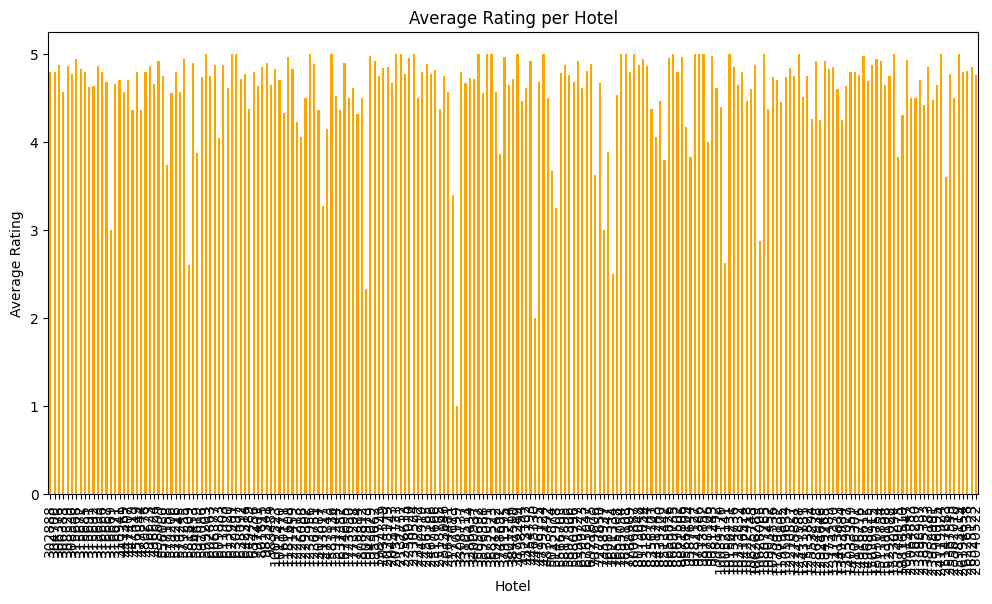

In [108]:
avg_rating_per_hotel = main_df.groupby('locationId')['rating'].mean()
avg_rating_per_hotel.plot(kind='bar', figsize=(12, 6), color='orange')
plt.xlabel('Hotel')
plt.ylabel('Average Rating')
plt.title('Average Rating per Hotel')
plt.show()


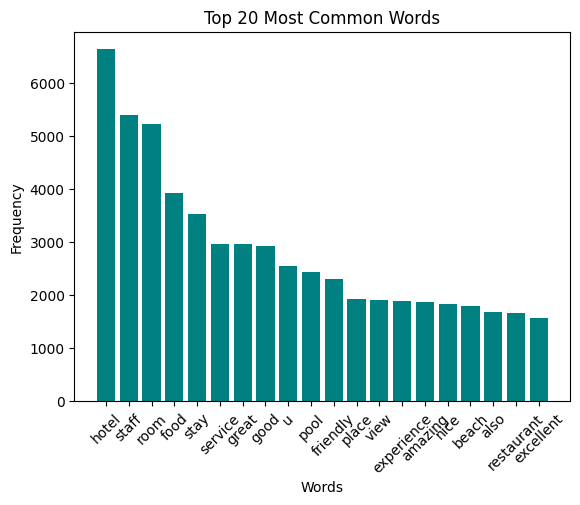

In [109]:
from collections import Counter

word_counts = Counter(" ".join(main_df['cleaned_text']).split())
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)

plt.bar(words, counts, color='teal')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.show()


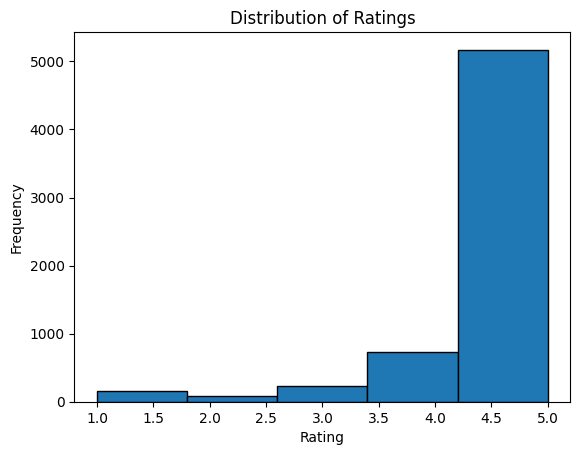

In [110]:
main_df['rating'].plot(kind='hist', bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


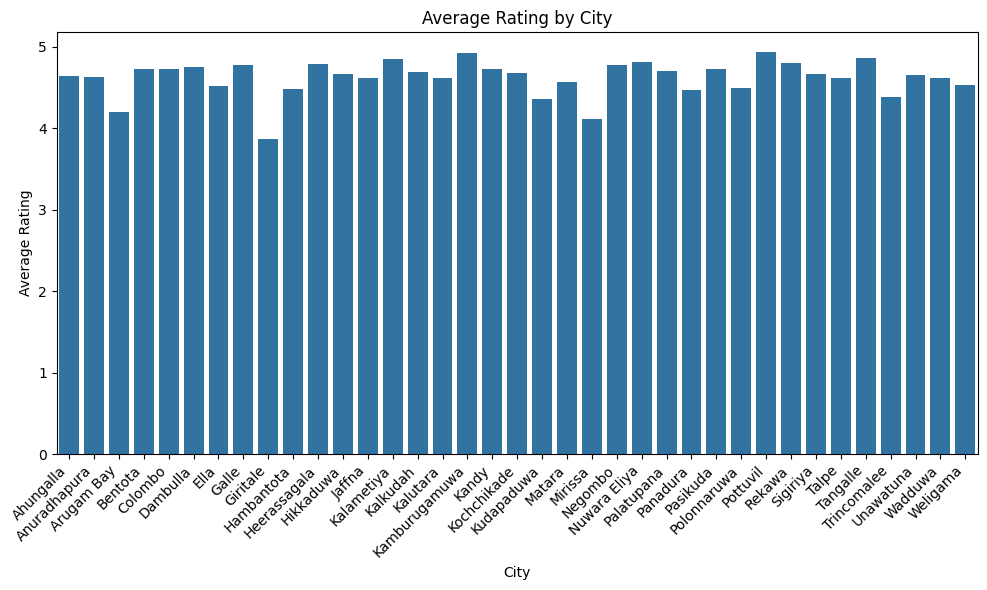

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming main_df has columns 'rating' and 'city'
# Calculate the average rating for each city
city_rating_avg = main_df.groupby('city')['rating'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='rating', data=city_rating_avg)

# Customize the plot
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.title('Average Rating by City')
plt.xticks(rotation=45, ha='right')  # Rotate city names if necessary for readability
plt.tight_layout()

# Show the plot
plt.show()


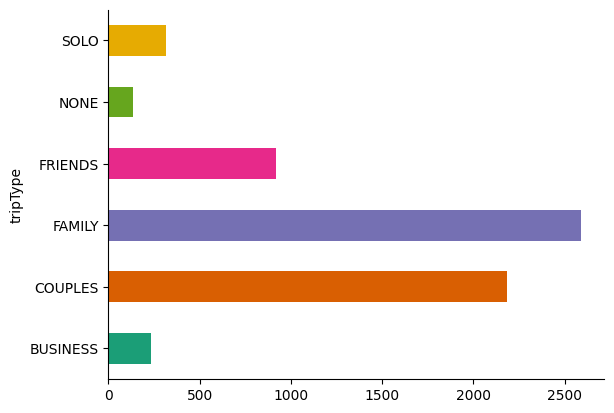

In [112]:
main_df.groupby('tripType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

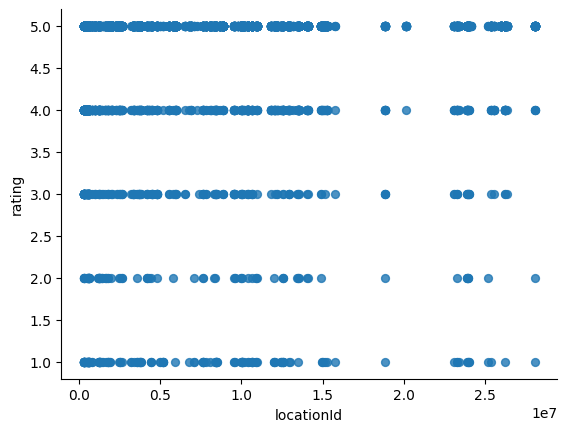

In [113]:
from matplotlib import pyplot as plt
main_df.plot(kind='scatter', x='locationId', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Task 2

# VADER

# Naive B

In [114]:
pip install scikit-learn

In [115]:
!pip install vaderSentiment

In [117]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Initialize VADER
vader_analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment using VADER
def classify_sentiment_vader(text):
    score = vader_analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Function to classify sentiment using TextBlob
def classify_sentiment_textblob(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment classifiers
main_df['vader_sentiment'] = main_df['cleaned_text'].apply(classify_sentiment_vader)
main_df['textblob_sentiment'] = main_df['cleaned_text'].apply(classify_sentiment_textblob)

# Majority voting to determine final sentiment label
def majority_vote(row):
    sentiments = [row['vader_sentiment'], row['textblob_sentiment']]
    return max(set(sentiments), key=sentiments.count)

main_df['sentiment'] = main_df.apply(majority_vote, axis=1)


In [56]:
main_df.head()

,helpfulVotes,id,lang,locationId,ownerResponse,photos,placeInfo,publishedDate,publishedPlatform,rating,...,word_tokens,sentence_tokens,subword_tokens,bigrams,trigrams,character_tokens,whitespace_tokens,vader_sentiment,textblob_sentiment,sentiment
0,0,978308991,en,14033359,NaN,"[{'id': '771259457', 'image': 'https://media-c...","{'id': '14033359', 'name': 'Le Grand Galle', '...",2024-11-01,OTHER,4,...,"[review, state, beautiful, hotel, commanding, ...",[review state beautiful hotel commanding sweep...,"[review, state, beautiful, hotel, commanding, ...","[(review, state), (state, beautiful), (beautif...","[(review, state, beautiful), (state, beautiful...","[r, e, v, i, e, w, , s, t, a, t, e, , b, e, ...","[review, state, beautiful, hotel, commanding, ...",Positive,Positive,Positive
1,0,978088291,en,14033359,NaN,"[{'id': '770885147', 'image': 'https://media-c...","{'id': '14033359', 'name': 'Le Grand Galle', '...",2024-10-30,OTHER,5,...,"[lovely, hotel, view, amazing, within, walking...",[lovely hotel view amazing within walking dist...,"[lovely, hotel, view, amazing, within, walking...","[(lovely, hotel), (hotel, view), (view, amazin...","[(lovely, hotel, view), (hotel, view, amazing)...","[l, o, v, e, l, y, , h, o, t, e, l, , v, i, ...","[lovely, hotel, view, amazing, within, walking...",Positive,Positive,Positive
2,0,978084110,en,14033359,NaN,[],"{'id': '14033359', 'name': 'Le Grand Galle', '...",2024-10-30,OTHER,5,...,"[stay, absolutely, perfect, staff, friendly, a...",[stay absolutely perfect staff friendly attent...,"[stay, absolutely, perfect, staff, friendly, a...","[(stay, absolutely), (absolutely, perfect), (p...","[(stay, absolutely, perfect), (absolutely, per...","[s, t, a, y, , a, b, s, o, l, u, t, e, l, y, ...","[stay, absolutely, perfect, staff, friendly, a...",Positive,Positive,Positive
3,0,976805351,en,14033359,"{'id': '978086677', 'text': ""Dear Guest,\n\nTh...",[],"{'id': '14033359', 'name': 'Le Grand Galle', '...",2024-10-27,OTHER,3,...,"[stay, le, grand, galle, hotel, generally, pos...",[stay le grand galle hotel generally positive ...,"[stay, le, grand, gall, ##e, hotel, generally,...","[(stay, le), (le, grand), (grand, galle), (gal...","[(stay, le, grand), (le, grand, galle), (grand...","[s, t, a, y, , l, e, , g, r, a, n, d, , g, ...","[stay, le, grand, galle, hotel, generally, pos...",Positive,Positive,Positive
4,0,974607870,en,14033359,"{'id': '978086673', 'text': ""Dear Guest,\n\nTh...",[],"{'id': '14033359', 'name': 'Le Grand Galle', '...",2024-10-19,OTHER,5,...,"[staff, member, friendly, supportive, meal, fa...",[staff member friendly supportive meal fabulou...,"[staff, member, friendly, supportive, meal, fa...","[(staff, member), (member, friendly), (friendl...","[(staff, member, friendly), (member, friendly,...","[s, t, a, f, f, , m, e, m, b, e, r, , f, r, ...","[staff, member, friendly, supportive, meal, fa...",Positive,Positive,Positive


In [77]:
# Vectorization
X = vectorizer.fit_transform(main_df['cleaned_text'])
y = main_df['sentiment']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = nb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


AttributeError: 'list' object has no attribute 'lower'

In [66]:
# Add Naive Bayes predictions to main_df
main_df['nb_model'] = nb_model.predict(vectorizer.transform(main_df['cleaned_text']))

def majority_vote_with_nb(row):
    sentiments = [
        row['vader_sentiment'],
        row['textblob_sentiment'],
        row['nb_model'] # Now 'nb_model' column is available for all rows.
    ]

    # Count votes for each sentiment
    sentiment_counts = {sentiment: sentiments.count(sentiment) for sentiment in set(sentiments)}

    # Check if 'nb_model' is in the sentiment_counts keys before accessing it
    # Determine the majority sentiment
    majority_sentiment = max(sentiment_counts, key=sentiment_counts.get)

    # Handle ties by prioritizing Naive Bayes (or based on another confidence mechanism)
    if list(sentiment_counts.values()).count(max(sentiment_counts.values())) > 1:
        # Example tie-break: prioritize Naive Bayes or choose based on confidence scores
        if 'nb_model' in sentiment_counts and sentiment_counts['nb_model'] == max(sentiment_counts.values()):
            return row['nb_model']

    return majority_sentiment

main_df['final_sentiment'] = main_df.apply(majority_vote_with_nb, axis=1)

In [67]:
main_df.head()

,helpfulVotes,id,lang,locationId,ownerResponse,photos,placeInfo,publishedDate,publishedPlatform,rating,...,subword_tokens,bigrams,trigrams,character_tokens,whitespace_tokens,vader_sentiment,textblob_sentiment,sentiment,nb_model,final_sentiment
0,0,978308991,en,14033359,NaN,"[{'id': '771259457', 'image': 'https://media-c...","{'id': '14033359', 'name': 'Le Grand Galle', '...",2024-11-01,OTHER,4,...,"[review, state, beautiful, hotel, commanding, ...","[(review, state), (state, beautiful), (beautif...","[(review, state, beautiful), (state, beautiful...","[r, e, v, i, e, w, , s, t, a, t, e, , b, e, ...","[review, state, beautiful, hotel, commanding, ...",Positive,Positive,Positive,Positive,Positive
1,0,978088291,en,14033359,NaN,"[{'id': '770885147', 'image': 'https://media-c...","{'id': '14033359', 'name': 'Le Grand Galle', '...",2024-10-30,OTHER,5,...,"[lovely, hotel, view, amazing, within, walking...","[(lovely, hotel), (hotel, view), (view, amazin...","[(lovely, hotel, view), (hotel, view, amazing)...","[l, o, v, e, l, y, , h, o, t, e, l, , v, i, ...","[lovely, hotel, view, amazing, within, walking...",Positive,Positive,Positive,Positive,Positive
2,0,978084110,en,14033359,NaN,[],"{'id': '14033359', 'name': 'Le Grand Galle', '...",2024-10-30,OTHER,5,...,"[stay, absolutely, perfect, staff, friendly, a...","[(stay, absolutely), (absolutely, perfect), (p...","[(stay, absolutely, perfect), (absolutely, per...","[s, t, a, y, , a, b, s, o, l, u, t, e, l, y, ...","[stay, absolutely, perfect, staff, friendly, a...",Positive,Positive,Positive,Positive,Positive
3,0,976805351,en,14033359,"{'id': '978086677', 'text': ""Dear Guest,\n\nTh...",[],"{'id': '14033359', 'name': 'Le Grand Galle', '...",2024-10-27,OTHER,3,...,"[stay, le, grand, gall, ##e, hotel, generally,...","[(stay, le), (le, grand), (grand, galle), (gal...","[(stay, le, grand), (le, grand, galle), (grand...","[s, t, a, y, , l, e, , g, r, a, n, d, , g, ...","[stay, le, grand, galle, hotel, generally, pos...",Positive,Positive,Positive,Positive,Positive
4,0,974607870,en,14033359,"{'id': '978086673', 'text': ""Dear Guest,\n\nTh...",[],"{'id': '14033359', 'name': 'Le Grand Galle', '...",2024-10-19,OTHER,5,...,"[staff, member, friendly, supportive, meal, fa...","[(staff, member), (member, friendly), (friendl...","[(staff, member, friendly), (member, friendly,...","[s, t, a, f, f, , m, e, m, b, e, r, , f, r, ...","[staff, member, friendly, supportive, meal, fa...",Positive,Positive,Positive,Positive,Positive


In [73]:
main_df[['cleaned_text', 'vader_sentiment', 'textblob_sentiment', 'nb_model', 'final_sentiment']].where(main_df['vader_sentiment'] == 'Neutral').dropna()

,cleaned_text,vader_sentiment,textblob_sentiment,nb_model,final_sentiment
442,hotel room expected small cramped people hotel...,Neutral,Positive,Positive,Positive
556,nice hotel highway room nicely furnished adequ...,Neutral,Positive,Positive,Positive
1008,staying place nightmare guest smoking room hal...,Neutral,Negative,Positive,Positive
1112,,Neutral,Neutral,Positive,Neutral
1243,standard food didnt feel fresh used evident st...,Neutral,Positive,Positive,Positive
1309,pillow softy ever room hygiene name sanjith ha...,Neutral,Positive,Positive,Positive
2119,load insect room change room even nd room inse...,Neutral,Neutral,Positive,Neutral
2520,even though check time pm got room pm getting ...,Neutral,Neutral,Positive,Neutral
2542,bald headed man beard think one manager hotel ...,Neutral,Positive,Positive,Positive
3223,night stay found frog lizard countless mosquit...,Neutral,Negative,Positive,Positive


In [76]:
main_df[['cleaned_text', 'vader_sentiment', 'textblob_sentiment', 'nb_model', 'final_sentiment']].where(main_df['vader_sentiment'] == 'Neutral').dropna()

,cleaned_text,vader_sentiment,textblob_sentiment,nb_model,final_sentiment
442,hotel room expected small cramped people hotel...,Neutral,Positive,Positive,Positive
556,nice hotel highway room nicely furnished adequ...,Neutral,Positive,Positive,Positive
1008,staying place nightmare guest smoking room hal...,Neutral,Negative,Positive,Positive
1112,,Neutral,Neutral,Positive,Neutral
1243,standard food didnt feel fresh used evident st...,Neutral,Positive,Positive,Positive
1309,pillow softy ever room hygiene name sanjith ha...,Neutral,Positive,Positive,Positive
2119,load insect room change room even nd room inse...,Neutral,Neutral,Positive,Neutral
2520,even though check time pm got room pm getting ...,Neutral,Neutral,Positive,Neutral
2542,bald headed man beard think one manager hotel ...,Neutral,Positive,Positive,Positive
3223,night stay found frog lizard countless mosquit...,Neutral,Negative,Positive,Positive


# Task 3